In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 4. Analysis of Relationships in Data
Conducting analysis of data of the two subsets of reddit submissions data.  
1. Above average submissions (score greater than DATA_SET_MEAN)
2. Below average submissions (subsampled submissions with score less than DATA_SET_MEAN)

In [29]:
above_avg = pd.read_json('./data-subsets/submissions-above-avg.json.gz', lines=True, orient='records', compression='gzip')
below_avg = pd.read_json('./data-subsets/submissions-below-avg.json.gz', lines=True, orient='records', compression='gzip')

In [30]:
above_avg['score'].describe()

count    102974.000000
mean       2324.750937
std        8696.375695
min          38.000000
25%          57.000000
50%         111.000000
75%         432.000000
max      202717.000000
Name: score, dtype: float64

In [31]:
below_avg['score'].describe()

count    102974.000000
mean          2.694641
std           3.736455
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max          37.000000
Name: score, dtype: float64

## 4.1 Post Title Analysis

Does the length of the post title have an affect on the submission score?  
Between above average and below average submissions, is there a difference in their title lengths?

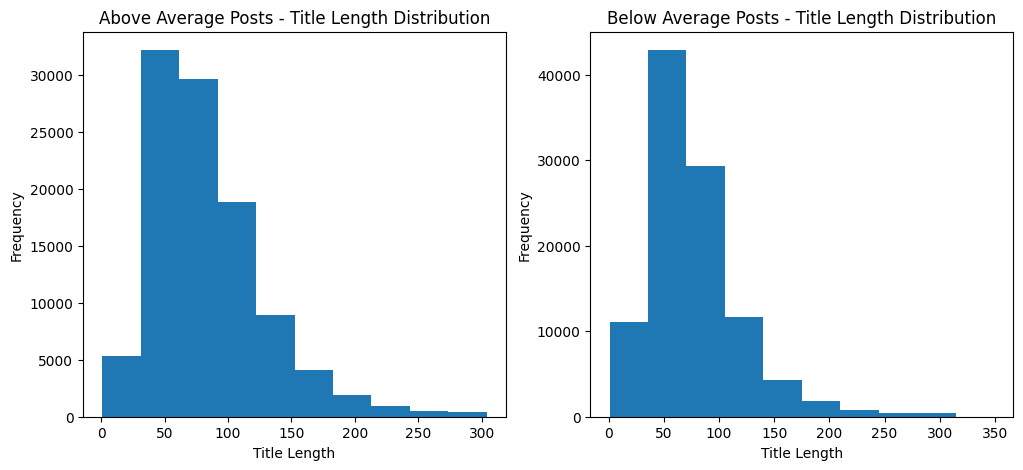

In [32]:
# Visualize the distributions of post title length between the two groups
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

axes[0].hist(above_avg['title_length'])
axes[0].set_title('Above Average Posts - Title Length Distribution')
axes[0].set_xlabel('Title Length')
axes[0].set_ylabel('Frequency')

axes[1].hist(below_avg['title_length'])
axes[1].set_title('Below Average Posts - Title Length Distribution')
axes[1].set_xlabel('Title Length')
axes[1].set_ylabel('Frequency')

fig.show()
fig.savefig('./figures/4.1-dist-above-vs-below-avg-title-length.jpg')

In [33]:
above_avg['title_length'].describe()

count    102974.000000
mean         83.965584
std          44.889916
min           1.000000
25%          52.000000
50%          74.000000
75%         105.000000
max         304.000000
Name: title_length, dtype: float64

In [34]:
below_avg['title_length'].describe()

count    102974.000000
mean         77.396993
std          43.359790
min           1.000000
25%          48.000000
50%          68.000000
75%          95.000000
max         349.000000
Name: title_length, dtype: float64

### 4.2 Mann Whitney U Test between the two groups on title_length
Assumptions of the test
- Observations of post title length are independent, the title of one submission does not affect another
- Post tile lengths are ordinal and can be sorted

Null hypothesis: Between the two groups, the sort order of title lengths is roughly equal  
Alternative hypothesis: Between the two groups, title lengths of one group tend to sort higher than the other

In [35]:
stats.mannwhitneyu(above_avg['title_length'], below_avg['title_length']).pvalue

4.715424283005718e-289

Conclusion?  

We reject the null hypothesis, the two groups of submissions do not have the same distribution for their title lengths.  
With a p value of 3.218388806506345e-297, we can say that the two groups have different title lengths

## 4.2 User Post Frequency Analysis

Does the frequency in which a user posts in certain subreddit affect their submission performance?  
Are above average posts created by users that frequently post more? Are below average posts from users that post less?

In [36]:
# Filter out [deleted] users
# post_count for deleted users are inaccurate as all [deleted] are counted as the same person
above_avg = above_avg[above_avg['author'] != '[deleted]']
below_avg = below_avg[below_avg['author'] != '[deleted]']

The different subreddits may have users that appear in both the above and below average set of submissions.  


In [37]:
common_authors = set(above_avg['author']).intersection(below_avg['author'])
len(common_authors)

9633

In [38]:
# Remove common_authors from both subsets
above_avg = above_avg[~above_avg['author'].isin(common_authors)]
below_avg = below_avg[~below_avg['author'].isin(common_authors)]

In [39]:
# Split into the different subreddits
# subs = ['AskReddit', 'Jokes', 'Showerthoughts']

above_avg_AskReddit = above_avg[above_avg['subreddit'] == 'AskReddit']
above_avg_Jokes = above_avg[above_avg['subreddit'] == 'Jokes']
above_avg_Showerthoughts = above_avg[above_avg['subreddit'] == 'Showerthoughts']

below_avg_AskReddit = below_avg[below_avg['subreddit'] == 'AskReddit']
below_avg_Jokes = below_avg[below_avg['subreddit'] == 'Jokes']
below_avg_Showerthoughts = below_avg[below_avg['subreddit'] == 'Showerthoughts']

subreddits_above_avg = [above_avg_AskReddit, above_avg_Jokes, above_avg_Showerthoughts]
subreddits_below_avg = [below_avg_AskReddit, below_avg_Jokes, below_avg_Showerthoughts]

### Subreddit: AskReddit

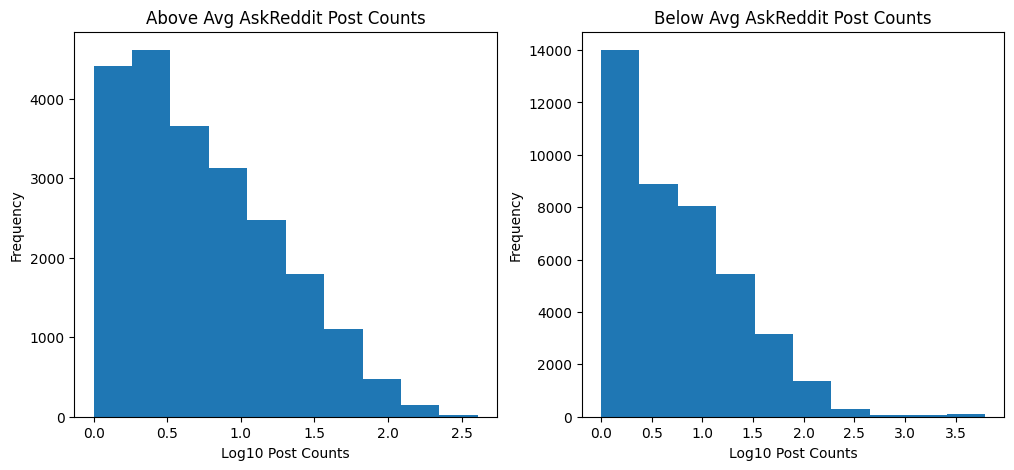

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

# Log so that the plotted graph is not as skewed
above = np.log10(above_avg_AskReddit['post_count'])
axes[0].hist(above)
axes[0].set_title('Above Avg AskReddit Post Counts')
axes[0].set_xlabel('Log10 Post Counts')
axes[0].set_ylabel('Frequency')

below = np.log10(below_avg_AskReddit['post_count'])
axes[1].hist(below)
axes[1].set_title('Below Avg AskReddit Post Counts')
axes[1].set_xlabel('Log10 Post Counts')
axes[1].set_ylabel('Frequency')

fig.show()

In [41]:
stats.mannwhitneyu(above, below).pvalue

0.7195124362627138

### Subreddit: Jokes

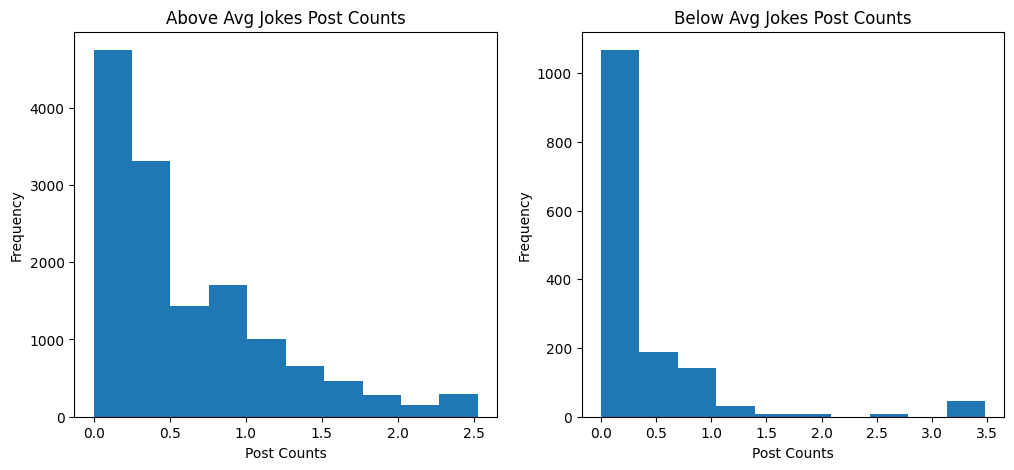

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

# Log so that the plotted graph is not as skewed
above = np.log10(above_avg_Jokes['post_count'])
axes[0].hist(above)
axes[0].set_title('Above Avg Jokes Post Counts')
axes[0].set_xlabel('Post Counts')
axes[0].set_ylabel('Frequency')

below = np.log10(below_avg_Jokes['post_count'])
axes[1].hist(below)
axes[1].set_title('Below Avg Jokes Post Counts')
axes[1].set_xlabel('Post Counts')
axes[1].set_ylabel('Frequency')

fig.show()

In [43]:
stats.mannwhitneyu(above, below).pvalue


1.226486215502343e-72

### Subreddit: Showerthoughts

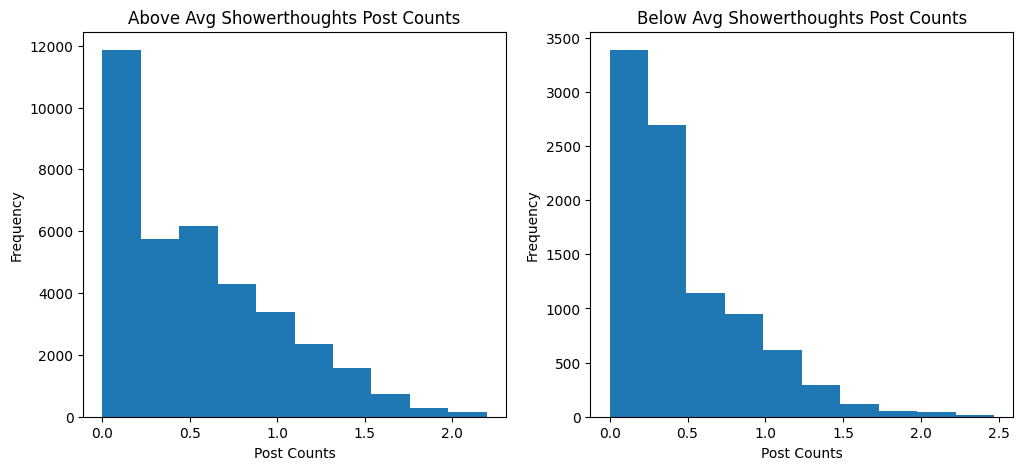

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

# Log so that the plotted graph is not as skewed
above = np.log10(above_avg_Showerthoughts['post_count'])
axes[0].hist(above)
axes[0].set_title('Above Avg Showerthoughts Post Counts')
axes[0].set_xlabel('Post Counts')
axes[0].set_ylabel('Frequency')

below = np.log10(below_avg_Showerthoughts['post_count'])
axes[1].hist(below)
axes[1].set_title('Below Avg Showerthoughts Post Counts')
axes[1].set_xlabel('Post Counts')
axes[1].set_ylabel('Frequency')

fig.show()

In [45]:
stats.mannwhitneyu(above, below).pvalue

2.875269787922374e-44

In [46]:
# Clean up to reduce duplicated memory usage
for subreddit in subreddits_above_avg:
    del subreddit

for subreddit in subreddits_below_avg:
    del subreddit

del above
del below

## 4.3 Post Time Analysis

People tend to scroll reddit while they are bored at work. 

In [47]:
# Reload data after the user post frequency analysis
above_avg = pd.read_json('./data-subsets/submissions-above-avg.json.gz', lines=True, orient='records', compression='gzip')
below_avg = pd.read_json('./data-subsets/submissions-below-avg.json.gz', lines=True, orient='records', compression='gzip')

Are posts made during working hours (between 9am and 5pm) on weekdays generally more successful than posts made outside these hours?

In [48]:
# Split above average posts into groups created in/out of active hours

# Between 9 am and 5 pm AND on a weekday
active = above_avg[(above_avg['hour'] >= 9) & (above_avg['hour'] <= 17) & ((above_avg['day_of_week'] != 1) | (above_avg['day_of_week'] != 7))]

# Post made on any other time
non_active = above_avg[~((above_avg['hour'] >= 9) & (above_avg['hour'] <= 17) & ((above_avg['day_of_week'] != 1) | (above_avg['day_of_week'] != 7)))]

In [49]:
assert active.shape[0] + non_active.shape[0] == below_avg.shape[0]

In [50]:
active.shape[0]

43165

In [51]:
non_active.shape[0]

59809

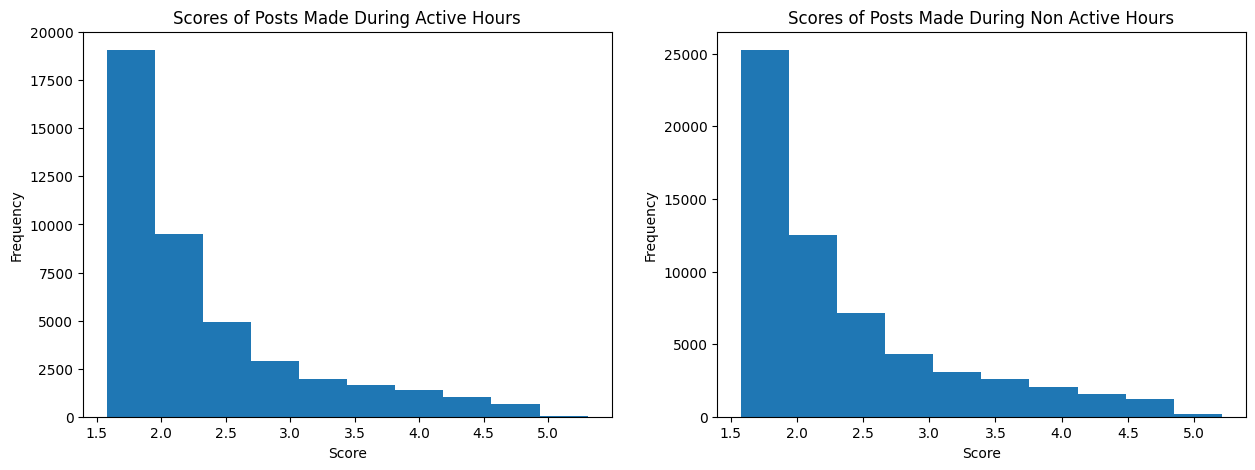

In [52]:
# Looking at the score distribution of posts made during active vs non active times
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

# Log so that the plotted graph is not as skewed
axes[0].hist(np.log10(active['score']))
axes[0].set_title('Scores of Posts Made During Active Hours')
axes[0].set_xlabel('Score')
axes[0].set_ylabel('Frequency')

axes[1].hist(np.log10(non_active['score']))
axes[1].set_title('Scores of Posts Made During Non Active Hours')
axes[1].set_xlabel('Score')
axes[1].set_ylabel('Frequency')

fig.show()

In [53]:
stats.mannwhitneyu(active['score'], non_active['score']).pvalue

2.5853368743875955e-09